# Exploring the trends in the ATP Tennis Players Performance: 2017-19

# The Top 500 Players Game Results from 2017-2019 in the Association of Tennis Professionals (ATP) Tour.

The data frame that our group chose provides details about the top 500 matches from 2017- 2019 in the Association of Tennis Professionals (ATP) Tour.  The ATP Tour is organized by the Association of Tennis Professionals, which is the only men's professional tennis tour in the world.  The Excel sheet includes various information, ranging from the winners’ and losers’ names, heights, countries, scores, etc. 

The data frame provides us with lots of variables such as winner player's id, height, age, country and a lot of other information. From this we will try to answer the following question:

Can we classify the country of origin (IOC Code) of the winning tennis players based on various predictors such as player ID, surface type, player name, height and age?

So we want to build a classification model that predits the country from which a winning tennis player originates using the features such as player ID, surface type of the  match, player name, player height and player age. The goal from the activity is to understand if there is a pattern in these fetures that can help us classify the country of origin of the winning player?

In [5]:
library(tidyverse)

#library(dpylr) 


In [6]:
library(readr)
library(dplyr)

# Read the dataset from the web into R
tennis_players <- read_csv("data/tennis_players.csv")

# Select specific columns and remove unnamed column if present
tennis_players <- tennis_players |>
                 select(surface:winner_age)|>
select(-draw_size:-winner_entry)
                   

# Print the resulting data frame
tennis_players

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


surface,winner_name,winner_hand,winner_ht,winner_ioc,winner_age
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Hard,Kei Nishikori,R,178,JPN,29.00479
Hard,Daniil Medvedev,R,NA,RUS,22.88569
Hard,Kei Nishikori,R,178,JPN,29.00479
Hard,Jo Wilfried Tsonga,R,188,FRA,33.70568
Hard,Daniil Medvedev,R,NA,RUS,22.88569
Hard,Jeremy Chardy,R,188,FRA,31.88227
Hard,Kei Nishikori,R,178,JPN,29.00479
Hard,Jo Wilfried Tsonga,R,188,FRA,33.70568
Hard,Alex De Minaur,R,NA,AUS,19.86858


From the above code we read a CSV file containing tennis player data inot R using 'read_csv()' function from the 'readr' package. SO when the data frame got printed we are able to see 6866 rows and 50 columns. From that we removed the unwanted varibles related to loser's data, and then we will try to predict the country of the winner, based on differnt predictors lised above. 

### As now we have the data we will try to tidy it.


We can tidy any data using following ways:
- Checking the missing values using 'is.na()' function.
- Checking if the dataset is in wide or long format and reshape it if needed using functions like 'pivot_longer()' or 'pivot_wider()'.
- We should also check if all the varibles are in correct type, like 'dbl(double)', 'fct(factor)' or 'chr(character)'

In [11]:
# we will start with renaming the column names:
tennis_players_short_data <- tennis_players|>
rename(winner_name = winner_name,
        winner_hand= winner_hand,
        winner_height = winner_ht,
        winner_country = winner_ioc,
        winner_age= winner_age)
tennis_players_short_data



surface,winner_name,winner_hand,winner_height,winner_country,winner_age
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Hard,Kei Nishikori,R,178,JPN,29.00479
Hard,Daniil Medvedev,R,NA,RUS,22.88569
Hard,Kei Nishikori,R,178,JPN,29.00479
Hard,Jo Wilfried Tsonga,R,188,FRA,33.70568
Hard,Daniil Medvedev,R,NA,RUS,22.88569
Hard,Jeremy Chardy,R,188,FRA,31.88227
Hard,Kei Nishikori,R,178,JPN,29.00479
Hard,Jo Wilfried Tsonga,R,188,FRA,33.70568
Hard,Alex De Minaur,R,NA,AUS,19.86858


In [8]:
#categorical varible
changed_data <- tennis_players_short_data|>
mutate(surface=as_factor(surface))


In [9]:
#now we will group the country of the winner:
winner_tennis <- changed_data|>
group_by(winner_country)|>
summarize(count=n(),
          average_height_country = mean(winner_height, na.rm=TRUE))|>
 arrange(desc(count)) |>
  filter(!is.na(average_height_country))|>
slice(1:50)
winner_tennis

winner_country,count,average_height_country
<chr>,<int>,<dbl>
FRA,709,187.8065
ESP,679,186.0724
USA,507,193.3354
GER,460,189.9818
ARG,389,184.4926
ITA,363,182.3632
RUS,356,185.0575
SRB,353,186.1649
AUS,295,189.6061


So from the above data we got that ARG(Argentina) appered most number of times, i.e. 389. But it is hard to visualize therefore we will make a plot to see the pattern.

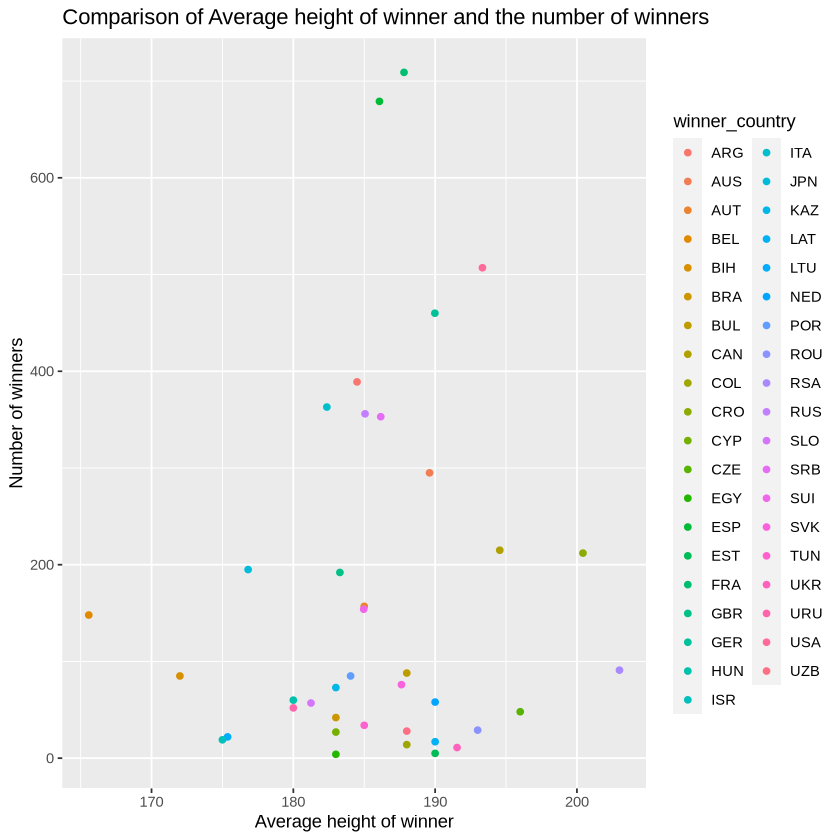

In [10]:
plot_winners <- winner_tennis|>
ggplot(aes(x=average_height_country, y=count, color=winner_country))+
           geom_point()+
           labs(title="Comparison of Average height of winner and the number of winners",
                x="Average height of winner",
                y="Number of winners",
                fill="Country")
           plot_winners